In [36]:
import sys


import numpy as np
import h5py
import Analysis
from copy import deepcopy

def AddFitMetadata(path, h5_path, A, extra_dict=None):
        h5 = h5py.File(path)
        
        try: 
            h5.create_group(h5_path)
        except:
            del h5[h5_path]
            h5.create_group(h5_path)
            

        fa = h5[h5_path].attrs
        fit = A.SaveFit()

        for key, val in fit.items():
            if key not in ['Data', 'energies', 'loglike', 'PSC']:
                fa.create('flux_'+key,val['flux'])
                fa.create('fluxunc_'+key,val['fluxunc'])        

        fa.create('loglike_total',np.sum(A.loglike))
        fa.create('loglike',A.loglike)
        fa.create('energies',A.central_energies)
        fa.create('bins', A.bin_edges)
        fa.create('irf', A.irf)
        fa.create('evclass', A.evclass)
        fa.create('convtype', A.convtype)
        fa.create('phfile', A.phfile)
        fa.create('tag', A.tag)

        if extra_dict is not None:
            for key, val in extra_dict.items():
                if key == 'residual':
                    try:
                        del h5[h5_path+'/residual']
                    except: 
                        pass

                    h5.create_dataset(h5_path+'/residual', data=val, dtype='float32')
                    print 'Saving new residual... Shape = ', val.shape
                else:
                    fa.create(key, val)
        h5.close()

def LoadModel(basedir, galprop_tag):
    # Load various diffuse models and run fits.
    print 'Running Analysis for model', galprop_tag
    
    
    #A = Analysis.Analysis(tag='P8R2_PSF3_CLEAN_V6_calore', basepath='/data/GCE_sys/')
    A = Analysis.Analysis(tag='P8R2_CLEAN_V6_calore', basepath='/data/GCE_sys/')
    
    
    A.GenSquareMask(l_range=[-7.5,7.5], b_range=[-7.5,7.5], plane_mask=1.)
    A.BinPhotons(infile='binned_photons_'+A.tag+'.npy')
    # Load 2FGL 
    A.AddPointSourceTemplate(fixNorm=True,pscmap='PSC_' + A.tag + '_fgl3_with_ext.npy')
    A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',psc_model='PSC_' + A.tag + '_fgl3_with_ext.npy',
                        alpha_psc=5., f_psc=0.1)
    A.AddIsotropicTemplate(fixNorm=False, fixSpectrum=False) # External chi^2 used to fix normalization within uncertainties
    
    A.AddFermiBubbleTemplate(template_file='./bubble_templates_diskcut30.0.fits', 
                         spec_file='./reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False, fixNorm=False)
    
    
    A.AddHDF5Template(hdf5file=basedir +'/'+ galprop_tag+'.hdf5',verbosity=1, multiplier=2., bremsfrac=1.25, 
                  E_subsample=2, fixSpectrum=False, separate_ics=False)
    return A



In [37]:
A = LoadModel('/data/GCE_sys/new','mod_s_42_XCO_P8')
A2 = LoadModel('/data/GCE_sys/new','mod_s_46_XCO_P8')
#/data/GCE_sys/new/mod_s_44_XCO_P8.hdf5

Running Analysis for model mod_s_42_XCO_P8
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
Running Analysis for model mod_s_46_XCO_P8
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...


In [38]:
A.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
               r_s=20.0, axesratio=1., offset=(0., 0.), spec_file=None,)
A2.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
               r_s=20.0, axesratio=1., offset=(0., 0.), spec_file=None,)

array([  8.28616975e-16,   0.00000000e+00,   0.00000000e+00, ...,
         0.00000000e+00,   0.00000000e+00,   8.28616975e-16])

In [41]:
A.ResetFit()    

# for key, template in A.templateList.items():
#     if key != 'DM':
#         template.limits=[0,None]
        
#     if key == 'DM':
#         template.limits=[0,None]

# for key, template in A2.templateList.items():
#     if key != 'DM':
#         template.limits=[0,None]
        
#     if key == 'DM':
#         template.limits=[0,None]

A.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]
A2.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]


Masking completed in 9.8456e-01 s
Write likelihood tempfile to  /tmp/tmpCJrO5_
Code generation completed in 9.3102e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -145198.71098 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.00324473795579 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_0,-5.593387e-01,1.976527e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_0,8.979847e-01,1.350756e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_0,1.145281e+00,2.887837e-01,0.000000e+00,0.000000e+00,,,
5,ICS_0,1.150044e+00,5.940238e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_0,1.407148e+00,3.555252e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.77e-02 s
Masking completed in 9.6252e-01 s
Write likelihood tempfile to  /tmp/tmp_j5FxQ
Code generation completed in 9.8610e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -126384.87374 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.000192095472517 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_1,-4.340627e-01,2.312233e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_1,9.411847e-01,1.367991e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_1,9.151531e-01,2.676259e-01,0.000000e+00,0.000000e+00,,,
5,ICS_1,1.096096e+00,5.968463e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_1,9.828542e-01,3.320675e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.76e-02 s
Masking completed in 9.6599e-01 s
Write likelihood tempfile to  /tmp/tmpa_i99J
Code generation completed in 9.5797e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -108420.698486 
 TOTAL NCALL = 145 
 NCALLS = 145 
 
 
 EDM = 4.87280851041e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_2,-1.737413e-01,2.479461e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_2,9.763767e-01,1.469281e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_2,8.850502e-01,2.424428e-01,0.000000e+00,0.000000e+00,,,
5,ICS_2,1.105184e+00,6.232077e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_2,8.303850e-01,3.156861e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.95e-02 s
Masking completed in 9.7377e-01 s
Write likelihood tempfile to  /tmp/tmpPebzZc
Code generation completed in 9.5892e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -88943.4928767 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 2.41459293437e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_3,-9.097133e-02,2.418118e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_3,9.958275e-01,1.591035e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_3,9.374792e-01,2.198674e-01,0.000000e+00,0.000000e+00,,,
5,ICS_3,1.104561e+00,6.485322e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_3,9.298631e-01,2.990243e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.79e-02 s
Masking completed in 9.6303e-01 s
Write likelihood tempfile to  /tmp/tmp6tIpRO
Code generation completed in 9.6107e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -87786.0922489 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 0.00538044651139 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_4,-2.126556e-02,2.618420e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_4,1.022770e+00,1.626452e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_4,8.957956e-01,1.861701e-01,0.000000e+00,0.000000e+00,,,
5,ICS_4,1.084927e+00,6.360701e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_4,6.277887e-01,2.833725e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.52e-02 s
Masking completed in 9.7498e-01 s
Write likelihood tempfile to  /tmp/tmpS7WFzW
Code generation completed in 9.6512e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -92064.7185495 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00457495093772 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_5,2.677322e-01,1.739783e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_5,1.075775e+00,1.664898e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_5,9.352020e-01,1.541909e-01,0.000000e+00,0.000000e+00,,,
5,ICS_5,1.028660e+00,6.276841e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_5,6.901165e-01,2.682903e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.56e-02 s
Masking completed in 9.5247e-01 s
Write likelihood tempfile to  /tmp/tmpjly1Mx
Code generation completed in 1.0149e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -92232.3259692 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.000133631049315 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_6,4.366743e-01,1.969572e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_6,1.088693e+00,1.631266e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_6,9.687216e-01,1.279573e-01,0.000000e+00,0.000000e+00,,,
5,ICS_6,8.941430e-01,6.018227e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_6,8.328028e-01,2.499691e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.32e-02 s
Masking completed in 9.3296e-01 s
Write likelihood tempfile to  /tmp/tmpsKirQo
Code generation completed in 1.0428e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -88818.681944 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 6.62583160366e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_7,3.177662e-01,1.566659e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_7,1.119322e+00,1.714205e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_7,9.683835e-01,1.199142e-01,0.000000e+00,0.000000e+00,,,
5,ICS_7,9.573574e-01,6.255101e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_7,7.614275e-01,2.419677e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.32e-02 s
Masking completed in 9.5469e-01 s
Write likelihood tempfile to  /tmp/tmpsZS9dX
Code generation completed in 9.5797e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -86714.5417195 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00101000293824 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_8,5.376577e-01,1.518283e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_8,1.098013e+00,1.712505e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_8,9.708516e-01,1.160721e-01,0.000000e+00,0.000000e+00,,,
5,ICS_8,8.919134e-01,5.810386e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_8,8.331896e-01,2.373224e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.57e-02 s
Masking completed in 9.6741e-01 s
Write likelihood tempfile to  /tmp/tmp2p2Xus
Code generation completed in 9.5892e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -80791.114287 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.000403132284285 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_9,4.545333e-01,1.408999e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_9,1.147201e+00,1.799635e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_9,9.864067e-01,1.139386e-01,0.000000e+00,0.000000e+00,,,
5,ICS_9,8.717095e-01,5.966580e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_9,9.722565e-01,2.384667e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.57e-02 s
Masking completed in 9.6347e-01 s
Write likelihood tempfile to  /tmp/tmpQx2soF
Code generation completed in 9.6703e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -80744.0536452 
 TOTAL NCALL = 125 
 NCALLS = 125 
 
 
 EDM = 0.00177718609125 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_10,7.428934e-01,1.038352e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_10,1.156786e+00,1.837781e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_10,9.755581e-01,1.165728e-01,0.000000e+00,0.000000e+00,,,
5,ICS_10,7.495427e-01,5.727787e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_10,7.811089e-01,2.463083e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.63e-02 s
Masking completed in 9.4872e-01 s
Write likelihood tempfile to  /tmp/tmpKNc5WK
Code generation completed in 9.5415e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -70512.2158916 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00171888531794 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_11,6.350936e-01,9.367561e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_11,1.149466e+00,1.957736e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_11,9.680834e-01,1.201594e-01,0.000000e+00,0.000000e+00,,,
5,ICS_11,8.132854e-01,5.900129e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_11,8.571505e-01,2.689190e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.55e-02 s
Masking completed in 4.3919e-01 s
Write likelihood tempfile to  /tmp/tmpoUEwZ7
Code generation completed in 9.5701e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -60104.3831257 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00156446939853 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_12,8.448573e-01,9.441165e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_12,1.178820e+00,2.115692e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_12,9.828438e-01,1.272627e-01,0.000000e+00,0.000000e+00,,,
5,ICS_12,6.703811e-01,5.977289e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_12,8.400130e-01,2.612319e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.58e-02 s
Masking completed in 2.2686e-01 s
Write likelihood tempfile to  /tmp/tmpAJv7NL
Code generation completed in 9.6202e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -50319.1549424 
 TOTAL NCALL = 127 
 NCALLS = 127 
 
 
 EDM = 0.000188549503761 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_13,7.880727e-01,8.035346e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_13,1.160919e+00,2.260518e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_13,9.815544e-01,1.322053e-01,0.000000e+00,0.000000e+00,,,
5,ICS_13,6.833837e-01,5.928128e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_13,8.822435e-01,2.469713e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.67e-02 s
Masking completed in 1.3275e-01 s
Write likelihood tempfile to  /tmp/tmpOBIYna
Code generation completed in 6.7667e-02 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -40762.7188513 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000128112880306 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_14,7.548692e-01,8.004171e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_14,1.196637e+00,2.476599e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_14,9.968966e-01,1.167025e-01,0.000000e+00,0.000000e+00,,,
5,ICS_14,7.026015e-01,5.909761e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_14,9.466015e-01,2.229762e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.55e-02 s
Masking completed in 1.3181e-01 s
Write likelihood tempfile to  /tmp/tmpxVFnrz
Code generation completed in 9.7990e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -30495.5655972 
 TOTAL NCALL = 110 
 NCALLS = 110 
 
 
 EDM = 0.00204370326391 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_15,6.401902e-01,6.762155e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_15,1.237825e+00,2.908595e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_15,9.811215e-01,1.111014e-01,0.000000e+00,0.000000e+00,,,
5,ICS_15,7.927966e-01,6.212948e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_15,8.451141e-01,2.066396e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.33e-02 s
Masking completed in 1.3265e-01 s
Write likelihood tempfile to  /tmp/tmpQF4NFW
Code generation completed in 1.0440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -20562.1526611 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 3.9238653146e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_16,7.558822e-01,6.260290e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_16,1.333191e+00,3.465539e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_16,9.913376e-01,1.287611e-01,0.000000e+00,0.000000e+00,,,
5,ICS_16,6.527264e-01,6.691456e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_16,8.950241e-01,2.388074e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.58e-02 s
Masking completed in 1.3227e-01 s
Write likelihood tempfile to  /tmp/tmpYfyZX4
Code generation completed in 9.9993e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -10356.7270105 
 TOTAL NCALL = 113 
 NCALLS = 113 
 
 
 EDM = 4.54588899322e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_17,7.445633e-01,6.507427e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_17,1.277661e+00,4.160119e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_17,9.996240e-01,1.534812e-01,0.000000e+00,0.000000e+00,,,
5,ICS_17,7.645788e-01,7.254674e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_17,1.180083e+00,2.346146e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.40e-02 s
Masking completed in 1.3230e-01 s
Write likelihood tempfile to  /tmp/tmpqz0n6x
Code generation completed in 9.8300e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -3454.45442967 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 2.75412806728e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_18,7.866148e-01,8.027869e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_18,1.446586e+00,5.123633e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_18,9.803840e-01,1.561345e-01,0.000000e+00,0.000000e+00,,,
5,ICS_18,5.741510e-01,7.688698e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_18,7.479177e-01,1.798268e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.58e-02 s
Masking completed in 1.3241e-01 s
Write likelihood tempfile to  /tmp/tmpLgiRsi
Code generation completed in 9.7680e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 689.144362825 
 TOTAL NCALL = 108 
 NCALLS = 108 
 
 
 EDM = 0.00293347188987 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_19,7.217288e-01,7.328865e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_19,1.322235e+00,6.534513e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_19,9.885421e-01,1.362089e-01,0.000000e+00,0.000000e+00,,,
5,ICS_19,6.993975e-01,8.823022e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_19,8.984535e-01,1.444902e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.27e-02 s
Masking completed in 1.3238e-01 s
Write likelihood tempfile to  /tmp/tmprYjzop
Code generation completed in 9.7394e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2875.77030946 
 TOTAL NCALL = 107 
 NCALLS = 107 
 
 
 EDM = 9.24509563956e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_20,7.607489e-01,1.310613e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_20,1.389142e+00,8.916834e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_20,1.000047e+00,1.299918e-01,0.000000e+00,0.000000e+00,,,
5,ICS_20,7.722480e-01,1.034931e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_20,9.685407e-01,1.327509e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.27e-02 s
Masking completed in 1.3250e-01 s
Write likelihood tempfile to  /tmp/tmp_9Zopx
Code generation completed in 1.0250e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 3161.9909088 
 TOTAL NCALL = 107 
 NCALLS = 107 
 
 
 EDM = 5.50312294004e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_21,4.749083e-01,1.165317e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_21,1.551317e+00,1.314951e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_21,1.003898e+00,1.220392e-01,0.000000e+00,0.000000e+00,,,
5,ICS_21,8.205190e-01,1.367106e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_21,9.824878e-01,1.210776e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.28e-02 s
Masking completed in 1.3238e-01 s
Write likelihood tempfile to  /tmp/tmpThRNxd
Code generation completed in 9.7418e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2415.57517565 
 TOTAL NCALL = 115 
 NCALLS = 115 
 
 
 EDM = 7.8253213376e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_22,8.153217e-01,1.762088e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_22,2.085896e+00,2.570077e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_22,9.977885e-01,1.256170e-01,0.000000e+00,0.000000e+00,,,
5,ICS_22,5.634525e-01,2.406063e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_22,9.707056e-01,1.054355e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.46e-02 s
Masking completed in 1.3248e-01 s
Write likelihood tempfile to  /tmp/tmpthwOyp
Code generation completed in 9.8610e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 1144.13659269 
 TOTAL NCALL = 144 
 NCALLS = 144 
 
 
 EDM = 8.1762013298e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_23,2.614948e-01,3.757926e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_23,3.420460e+00,7.061950e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_23,9.992458e-01,2.221602e-01,0.000000e+00,0.000000e+00,,,
5,ICS_23,1.086857e+00,6.689070e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_23,9.737464e-01,1.556804e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   3.01e-02 s


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_0,-5.593387e-01,1.976409e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_0,8.979847e-01,1.350667e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_0,1.145281e+00,2.887781e-01,0.000000e+00,0.000000e+00,,,
5,ICS_0,1.150044e+00,5.939609e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_0,1.407148e+00,3.554352e-01,0.000000e+00,0.000000e+00,,,


+,DM_0,Pi0_Brems_0,Isotropic_0,ICS_0,Bubbles_0
DM_0,1.00,-0.07,-0.03,-0.66,-0.06
Pi0_Brems_0,-0.07,1.00,0.28,-0.55,0.25
Isotropic_0,-0.03,0.28,1.00,-0.46,-0.06
ICS_0,-0.66,-0.55,-0.46,1.00,-0.24
Bubbles_0,-0.06,0.25,-0.06,-0.24,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_1,-4.340627e-01,2.312082e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_1,9.411847e-01,1.367907e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_1,9.151531e-01,2.676213e-01,0.000000e+00,0.000000e+00,,,
5,ICS_1,1.096096e+00,5.967774e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_1,9.828542e-01,3.319788e-01,0.000000e+00,0.000000e+00,,,


+,DM_1,Pi0_Brems_1,Isotropic_1,ICS_1,Bubbles_1
DM_1,1.00,-0.02,-0.02,-0.72,-0.04
Pi0_Brems_1,-0.02,1.00,0.24,-0.53,0.23
Isotropic_1,-0.02,0.24,1.00,-0.41,-0.07
ICS_1,-0.72,-0.53,-0.41,1.00,-0.24
Bubbles_1,-0.04,0.23,-0.07,-0.24,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_2,-1.737413e-01,2.479377e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_2,9.763767e-01,1.469221e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_2,8.850502e-01,2.424411e-01,0.000000e+00,0.000000e+00,,,
5,ICS_2,1.105184e+00,6.231609e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_2,8.303850e-01,3.156163e-01,0.000000e+00,0.000000e+00,,,


+,DM_2,Pi0_Brems_2,Isotropic_2,ICS_2,Bubbles_2
DM_2,1.00,0.00,-0.01,-0.74,-0.03
Pi0_Brems_2,0.00,1.00,0.20,-0.52,0.21
Isotropic_2,-0.01,0.20,1.00,-0.36,-0.06
ICS_2,-0.74,-0.52,-0.36,1.00,-0.24
Bubbles_2,-0.03,0.21,-0.06,-0.24,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_3,-9.097133e-02,2.418086e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_3,9.958275e-01,1.591007e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_3,9.374792e-01,2.198670e-01,0.000000e+00,0.000000e+00,,,
5,ICS_3,1.104561e+00,6.485097e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_3,9.298631e-01,2.989897e-01,0.000000e+00,0.000000e+00,,,


+,DM_3,Pi0_Brems_3,Isotropic_3,ICS_3,Bubbles_3
DM_3,1.00,0.01,-0.01,-0.77,-0.01
Pi0_Brems_3,0.01,1.00,0.16,-0.51,0.18
Isotropic_3,-0.01,0.16,1.00,-0.32,-0.05
ICS_3,-0.77,-0.51,-0.32,1.00,-0.23
Bubbles_3,-0.01,0.18,-0.05,-0.23,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_4,-2.126556e-02,2.618453e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_4,1.022770e+00,1.626425e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_4,8.957956e-01,1.861701e-01,0.000000e+00,0.000000e+00,,,
5,ICS_4,1.084927e+00,6.360610e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_4,6.277887e-01,2.833389e-01,0.000000e+00,0.000000e+00,,,


+,DM_4,Pi0_Brems_4,Isotropic_4,ICS_4,Bubbles_4
DM_4,1.00,0.03,-0.00,-0.77,-0.00
Pi0_Brems_4,0.03,1.00,0.14,-0.52,0.17
Isotropic_4,-0.00,0.14,1.00,-0.28,-0.04
ICS_4,-0.77,-0.52,-0.28,1.00,-0.24
Bubbles_4,-0.00,0.17,-0.04,-0.24,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_5,2.677322e-01,1.739808e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_5,1.075775e+00,1.664858e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_5,9.352020e-01,1.541722e-01,0.000000e+00,0.000000e+00,,,
5,ICS_5,1.028660e+00,6.276573e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_5,6.901165e-01,2.682567e-01,0.000000e+00,0.000000e+00,,,


+,DM_5,Pi0_Brems_5,Isotropic_5,ICS_5,Bubbles_5
DM_5,1.00,0.01,-0.00,-0.77,0.01
Pi0_Brems_5,0.01,1.00,0.11,-0.52,0.17
Isotropic_5,-0.00,0.11,1.00,-0.25,-0.04
ICS_5,-0.77,-0.52,-0.25,1.00,-0.26
Bubbles_5,0.01,0.17,-0.04,-0.26,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_6,4.366743e-01,1.935919e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_6,1.088693e+00,1.625863e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_6,9.687216e-01,1.278831e-01,0.000000e+00,0.000000e+00,,,
5,ICS_6,8.941430e-01,5.889725e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_6,8.328028e-01,2.496945e-01,0.000000e+00,0.000000e+00,,,


+,DM_6,Pi0_Brems_6,Isotropic_6,ICS_6,Bubbles_6
DM_6,1.00,-0.00,0.00,-0.77,0.02
Pi0_Brems_6,-0.00,1.00,0.10,-0.52,0.16
Isotropic_6,0.00,0.10,1.00,-0.22,-0.03
ICS_6,-0.77,-0.52,-0.22,1.00,-0.27
Bubbles_6,0.02,0.16,-0.03,-0.27,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_7,3.177662e-01,1.539978e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_7,1.119322e+00,1.707741e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_7,9.683835e-01,1.198585e-01,0.000000e+00,0.000000e+00,,,
5,ICS_7,9.573574e-01,6.125891e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_7,7.614275e-01,2.417135e-01,0.000000e+00,0.000000e+00,,,


+,DM_7,Pi0_Brems_7,Isotropic_7,ICS_7,Bubbles_7
DM_7,1.00,0.00,0.00,-0.76,0.02
Pi0_Brems_7,0.00,1.00,0.08,-0.53,0.15
Isotropic_7,0.00,0.08,1.00,-0.20,-0.03
ICS_7,-0.76,-0.53,-0.20,1.00,-0.27
Bubbles_7,0.02,0.15,-0.03,-0.27,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_8,5.376577e-01,1.518294e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_8,1.098013e+00,1.712487e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_8,9.708516e-01,1.160693e-01,0.000000e+00,0.000000e+00,,,
5,ICS_8,8.919134e-01,5.810229e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_8,8.331896e-01,2.372980e-01,0.000000e+00,0.000000e+00,,,


+,DM_8,Pi0_Brems_8,Isotropic_8,ICS_8,Bubbles_8
DM_8,1.00,-0.03,0.00,-0.74,0.03
Pi0_Brems_8,-0.03,1.00,0.08,-0.54,0.14
Isotropic_8,0.00,0.08,1.00,-0.19,-0.03
ICS_8,-0.74,-0.54,-0.19,1.00,-0.29
Bubbles_8,0.03,0.14,-0.03,-0.29,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_9,4.545333e-01,1.408986e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_9,1.147201e+00,1.799618e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_9,9.864067e-01,1.139367e-01,0.000000e+00,0.000000e+00,,,
5,ICS_9,8.717095e-01,5.966360e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_9,9.722565e-01,2.384458e-01,0.000000e+00,0.000000e+00,,,


+,DM_9,Pi0_Brems_9,Isotropic_9,ICS_9,Bubbles_9
DM_9,1.00,-0.03,0.00,-0.74,0.04
Pi0_Brems_9,-0.03,1.00,0.07,-0.54,0.14
Isotropic_9,0.00,0.07,1.00,-0.18,-0.03
ICS_9,-0.74,-0.54,-0.18,1.00,-0.28
Bubbles_9,0.04,0.14,-0.03,-0.28,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_10,7.428934e-01,1.038382e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_10,1.156786e+00,1.837779e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_10,9.755581e-01,1.165714e-01,0.000000e+00,0.000000e+00,,,
5,ICS_10,7.495427e-01,5.727718e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_10,7.811089e-01,2.462750e-01,0.000000e+00,0.000000e+00,,,


+,DM_10,Pi0_Brems_10,Isotropic_10,ICS_10,Bubbles_10
DM_10,1.00,-0.06,0.01,-0.70,0.05
Pi0_Brems_10,-0.06,1.00,0.07,-0.55,0.14
Isotropic_10,0.01,0.07,1.00,-0.17,-0.03
ICS_10,-0.70,-0.55,-0.17,1.00,-0.32
Bubbles_10,0.05,0.14,-0.03,-0.32,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_11,6.350936e-01,9.367711e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_11,1.149466e+00,1.957715e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_11,9.680834e-01,1.201584e-01,0.000000e+00,0.000000e+00,,,
5,ICS_11,8.132854e-01,5.899837e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_11,8.571505e-01,2.688692e-01,0.000000e+00,0.000000e+00,,,


+,DM_11,Pi0_Brems_11,Isotropic_11,ICS_11,Bubbles_11
DM_11,1.00,-0.07,0.01,-0.68,0.06
Pi0_Brems_11,-0.07,1.00,0.06,-0.57,0.15
Isotropic_11,0.01,0.06,1.00,-0.16,-0.03
ICS_11,-0.68,-0.57,-0.16,1.00,-0.36
Bubbles_11,0.06,0.15,-0.03,-0.36,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_12,8.448573e-01,9.441422e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_12,1.178820e+00,2.115683e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_12,9.828438e-01,1.272620e-01,0.000000e+00,0.000000e+00,,,
5,ICS_12,6.703811e-01,5.976989e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_12,8.400130e-01,2.611741e-01,0.000000e+00,0.000000e+00,,,


+,DM_12,Pi0_Brems_12,Isotropic_12,ICS_12,Bubbles_12
DM_12,1.00,-0.09,0.01,-0.65,0.06
Pi0_Brems_12,-0.09,1.00,0.06,-0.58,0.16
Isotropic_12,0.01,0.06,1.00,-0.15,-0.03
ICS_12,-0.65,-0.58,-0.15,1.00,-0.38
Bubbles_12,0.06,0.16,-0.03,-0.38,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_13,7.880727e-01,8.035379e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_13,1.160919e+00,2.260477e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_13,9.815544e-01,1.322047e-01,0.000000e+00,0.000000e+00,,,
5,ICS_13,6.833837e-01,5.927696e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_13,8.822435e-01,2.469274e-01,0.000000e+00,0.000000e+00,,,


+,DM_13,Pi0_Brems_13,Isotropic_13,ICS_13,Bubbles_13
DM_13,1.00,-0.11,0.01,-0.62,0.07
Pi0_Brems_13,-0.11,1.00,0.05,-0.59,0.14
Isotropic_13,0.01,0.05,1.00,-0.15,-0.03
ICS_13,-0.62,-0.59,-0.15,1.00,-0.38
Bubbles_13,0.07,0.14,-0.03,-0.38,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_14,7.548692e-01,8.004214e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_14,1.196637e+00,2.476571e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_14,9.968966e-01,1.167023e-01,0.000000e+00,0.000000e+00,,,
5,ICS_14,7.026015e-01,5.909377e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_14,9.466015e-01,2.229415e-01,0.000000e+00,0.000000e+00,,,


+,DM_14,Pi0_Brems_14,Isotropic_14,ICS_14,Bubbles_14
DM_14,1.00,-0.14,0.01,-0.58,0.07
Pi0_Brems_14,-0.14,1.00,0.04,-0.61,0.14
Isotropic_14,0.01,0.04,1.00,-0.13,-0.02
ICS_14,-0.58,-0.61,-0.13,1.00,-0.39
Bubbles_14,0.07,0.14,-0.02,-0.39,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_15,6.401902e-01,6.762069e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_15,1.237825e+00,2.908549e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_15,9.811215e-01,1.111014e-01,0.000000e+00,0.000000e+00,,,
5,ICS_15,7.927966e-01,6.212644e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_15,8.451141e-01,2.066194e-01,0.000000e+00,0.000000e+00,,,


+,DM_15,Pi0_Brems_15,Isotropic_15,ICS_15,Bubbles_15
DM_15,1.00,-0.15,0.01,-0.53,0.07
Pi0_Brems_15,-0.15,1.00,0.04,-0.65,0.13
Isotropic_15,0.01,0.04,1.00,-0.12,-0.02
ICS_15,-0.53,-0.65,-0.12,1.00,-0.37
Bubbles_15,0.07,0.13,-0.02,-0.37,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_16,7.558822e-01,6.260221e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_16,1.333191e+00,3.465475e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_16,9.913376e-01,1.287610e-01,0.000000e+00,0.000000e+00,,,
5,ICS_16,6.527264e-01,6.690951e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_16,8.950241e-01,2.387785e-01,0.000000e+00,0.000000e+00,,,


+,DM_16,Pi0_Brems_16,Isotropic_16,ICS_16,Bubbles_16
DM_16,1.00,-0.15,0.01,-0.50,0.07
Pi0_Brems_16,-0.15,1.00,0.04,-0.67,0.14
Isotropic_16,0.01,0.04,1.00,-0.12,-0.02
ICS_16,-0.50,-0.67,-0.12,1.00,-0.39
Bubbles_16,0.07,0.14,-0.02,-0.39,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_17,7.445633e-01,6.507401e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_17,1.277661e+00,4.160080e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_17,9.996240e-01,1.534811e-01,0.000000e+00,0.000000e+00,,,
5,ICS_17,7.645788e-01,7.254344e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_17,1.180083e+00,2.345953e-01,0.000000e+00,0.000000e+00,,,


+,DM_17,Pi0_Brems_17,Isotropic_17,ICS_17,Bubbles_17
DM_17,1.00,-0.14,0.01,-0.47,0.08
Pi0_Brems_17,-0.14,1.00,0.04,-0.70,0.14
Isotropic_17,0.01,0.04,1.00,-0.14,-0.02
ICS_17,-0.47,-0.70,-0.14,1.00,-0.39
Bubbles_17,0.08,0.14,-0.02,-0.39,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_18,7.866148e-01,8.027846e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_18,1.446586e+00,5.123613e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_18,9.803840e-01,1.561344e-01,0.000000e+00,0.000000e+00,,,
5,ICS_18,5.741510e-01,7.688561e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_18,7.479177e-01,1.798216e-01,0.000000e+00,0.000000e+00,,,


+,DM_18,Pi0_Brems_18,Isotropic_18,ICS_18,Bubbles_18
DM_18,1.00,-0.13,0.02,-0.45,0.07
Pi0_Brems_18,-0.13,1.00,0.04,-0.72,0.11
Isotropic_18,0.02,0.04,1.00,-0.14,-0.02
ICS_18,-0.45,-0.72,-0.14,1.00,-0.34
Bubbles_18,0.07,0.11,-0.02,-0.34,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_19,7.217288e-01,7.328805e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_19,1.322235e+00,6.534472e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_19,9.885421e-01,1.362088e-01,0.000000e+00,0.000000e+00,,,
5,ICS_19,6.993975e-01,8.822924e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_19,8.984535e-01,1.444892e-01,0.000000e+00,0.000000e+00,,,


+,DM_19,Pi0_Brems_19,Isotropic_19,ICS_19,Bubbles_19
DM_19,1.00,-0.11,0.02,-0.45,0.06
Pi0_Brems_19,-0.11,1.00,0.04,-0.74,0.11
Isotropic_19,0.02,0.04,1.00,-0.12,-0.01
ICS_19,-0.45,-0.74,-0.12,1.00,-0.30
Bubbles_19,0.06,0.11,-0.01,-0.30,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_20,7.607489e-01,1.310613e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_20,1.389142e+00,8.916868e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_20,1.000047e+00,1.299918e-01,0.000000e+00,0.000000e+00,,,
5,ICS_20,7.722480e-01,1.034933e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_20,9.685407e-01,1.327498e-01,0.000000e+00,0.000000e+00,,,


+,DM_20,Pi0_Brems_20,Isotropic_20,ICS_20,Bubbles_20
DM_20,1.00,-0.11,0.01,-0.42,0.05
Pi0_Brems_20,-0.11,1.00,0.03,-0.75,0.09
Isotropic_20,0.01,0.03,1.00,-0.10,-0.01
ICS_20,-0.42,-0.75,-0.10,1.00,-0.26
Bubbles_20,0.05,0.09,-0.01,-0.26,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_21,4.749083e-01,1.165309e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_21,1.551317e+00,1.314944e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_21,1.003898e+00,1.220391e-01,0.000000e+00,0.000000e+00,,,
5,ICS_21,8.205190e-01,1.367092e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_21,9.824878e-01,1.210772e-01,0.000000e+00,0.000000e+00,,,


+,DM_21,Pi0_Brems_21,Isotropic_21,ICS_21,Bubbles_21
DM_21,1.00,-0.09,0.01,-0.45,0.04
Pi0_Brems_21,-0.09,1.00,0.02,-0.76,0.07
Isotropic_21,0.01,0.02,1.00,-0.08,-0.01
ICS_21,-0.45,-0.76,-0.08,1.00,-0.20
Bubbles_21,0.04,0.07,-0.01,-0.20,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_22,8.153217e-01,1.762074e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_22,2.085896e+00,2.570099e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_22,9.977885e-01,1.256170e-01,0.000000e+00,0.000000e+00,,,
5,ICS_22,5.634525e-01,2.406068e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_22,9.707056e-01,1.054353e-01,0.000000e+00,0.000000e+00,,,


+,DM_22,Pi0_Brems_22,Isotropic_22,ICS_22,Bubbles_22
DM_22,1.00,-0.06,0.01,-0.46,0.03
Pi0_Brems_22,-0.06,1.00,0.02,-0.78,0.05
Isotropic_22,0.01,0.02,1.00,-0.06,-0.00
ICS_22,-0.46,-0.78,-0.06,1.00,-0.14
Bubbles_22,0.03,0.05,-0.00,-0.14,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_23,2.614948e-01,3.758125e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_23,3.420460e+00,7.062426e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_23,9.992458e-01,2.221603e-01,0.000000e+00,0.000000e+00,,,
5,ICS_23,1.086857e+00,6.689741e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_23,9.737464e-01,1.556805e-01,0.000000e+00,0.000000e+00,,,


+,DM_23,Pi0_Brems_23,Isotropic_23,ICS_23,Bubbles_23
DM_23,1.00,-0.10,0.01,-0.43,0.02
Pi0_Brems_23,-0.10,1.00,0.01,-0.78,0.03
Isotropic_23,0.01,0.01,1.00,-0.04,-0.00
ICS_23,-0.43,-0.78,-0.04,1.00,-0.09
Bubbles_23,0.02,0.03,-0.00,-0.09,1.00


Masking completed in 1.6519e-01 s
Write likelihood tempfile to  /tmp/tmpRyTiDz
Code generation completed in 9.7799e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -145186.919588 
 TOTAL NCALL = 68 
 NCALLS = 68 
 
 
 EDM = 0.000108217306204 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_0,-1.324266e+00,2.664193e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_0,8.734819e-01,1.776577e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_0,1.380623e+00,2.816973e-01,0.000000e+00,0.000000e+00,,,
5,ICS_0,9.480421e-01,6.994164e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_0,1.582724e+00,3.521415e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.53e-02 s
Masking completed in 1.3288e-01 s
Write likelihood tempfile to  /tmp/tmpAQY00V
Code generation completed in 1.0030e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -126378.528984 
 TOTAL NCALL = 76 
 NCALLS = 76 
 
 
 EDM = 5.69448562066e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_1,-1.374856e+00,3.166883e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_1,9.119196e-01,1.775158e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_1,1.104280e+00,2.624547e-01,0.000000e+00,0.000000e+00,,,
5,ICS_1,9.210482e-01,7.092613e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_1,1.157029e+00,3.289597e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.67e-02 s
Masking completed in 1.3273e-01 s
Write likelihood tempfile to  /tmp/tmpQQ1LLZ
Code generation completed in 9.7895e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -108419.675594 
 TOTAL NCALL = 64 
 NCALLS = 64 
 
 
 EDM = 0.000754763378117 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_2,-1.315269e+00,3.412023e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_2,9.368907e-01,1.880188e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_2,1.024800e+00,2.388321e-01,0.000000e+00,0.000000e+00,,,
5,ICS_2,9.673468e-01,7.449395e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_2,9.978308e-01,3.126271e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.45e-02 s
Masking completed in 1.3261e-01 s
Write likelihood tempfile to  /tmp/tmpFKf1O6
Code generation completed in 9.8014e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -88935.190465 
 TOTAL NCALL = 72 
 NCALLS = 72 
 
 
 EDM = 9.65705938969e-08 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_3,-1.078958e+00,3.336842e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_3,9.565260e-01,1.997445e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_3,1.088461e+00,2.173799e-01,0.000000e+00,0.000000e+00,,,
5,ICS_3,9.478350e-01,7.786903e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_3,1.115264e+00,2.964879e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.60e-02 s
Masking completed in 1.3271e-01 s
Write likelihood tempfile to  /tmp/tmpoOsIwB
Code generation completed in 9.6703e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -87789.9771115 
 TOTAL NCALL = 60 
 NCALLS = 60 
 
 
 EDM = 0.00280145860561 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_4,-1.303520e+00,3.613654e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_4,9.679003e-01,2.008087e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_4,9.859107e-01,1.845400e-01,0.000000e+00,0.000000e+00,,,
5,ICS_4,9.793147e-01,7.633480e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_4,8.256405e-01,2.807313e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.38e-02 s
Masking completed in 1.3278e-01 s
Write likelihood tempfile to  /tmp/tmp5cTvpM
Code generation completed in 1.6744e-01 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -92061.605737 
 TOTAL NCALL = 64 
 NCALLS = 64 
 
 
 EDM = 0.000130205401633 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_5,-5.804342e-01,2.399825e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_5,1.021905e+00,2.026341e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_5,1.007596e+00,1.531528e-01,0.000000e+00,0.000000e+00,,,
5,ICS_5,9.212461e-01,7.542584e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_5,8.837379e-01,2.653508e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   4.13e-02 s
Masking completed in 1.9921e-01 s
Write likelihood tempfile to  /tmp/tmpqdjosv
Code generation completed in 1.0650e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -92229.1408144 
 TOTAL NCALL = 72 
 NCALLS = 72 
 
 
 EDM = 4.48713380624e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_6,-4.735940e-01,2.678693e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_6,1.040438e+00,1.947886e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_6,1.022853e+00,1.272127e-01,0.000000e+00,0.000000e+00,,,
5,ICS_6,7.848186e-01,7.089569e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_6,9.961920e-01,2.469663e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.85e-02 s
Masking completed in 1.3664e-01 s
Write likelihood tempfile to  /tmp/tmpdDvpRY
Code generation completed in 9.8395e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -88805.0758119 
 TOTAL NCALL = 70 
 NCALLS = 70 
 
 
 EDM = 6.29794131063e-07 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_7,-4.524240e-01,2.135980e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_7,1.063346e+00,2.021664e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_7,1.025820e+00,1.193333e-01,0.000000e+00,0.000000e+00,,,
5,ICS_7,8.518093e-01,7.368970e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_7,9.532736e-01,2.387833e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.57e-02 s
Masking completed in 1.3408e-01 s
Write likelihood tempfile to  /tmp/tmpGysbhb
Code generation completed in 1.0009e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -86710.6425657 
 TOTAL NCALL = 70 
 NCALLS = 70 
 
 
 EDM = 1.45147715141e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_8,-4.252798e-01,2.111871e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_8,1.026656e+00,2.004827e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_8,1.014719e+00,1.155951e-01,0.000000e+00,0.000000e+00,,,
5,ICS_8,8.612788e-01,7.028566e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_8,9.937658e-01,2.342122e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.57e-02 s
Masking completed in 1.3406e-01 s
Write likelihood tempfile to  /tmp/tmp8Ow3vQ
Code generation completed in 9.8300e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -80766.2538647 
 TOTAL NCALL = 70 
 NCALLS = 70 
 
 
 EDM = 2.49967570822e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_9,-2.898748e-01,1.968540e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_9,1.082845e+00,2.088380e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_9,1.037637e+00,1.135241e-01,0.000000e+00,0.000000e+00,,,
5,ICS_9,7.917885e-01,7.224098e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_9,1.164457e+00,2.353611e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.63e-02 s
Masking completed in 1.3407e-01 s
Write likelihood tempfile to  /tmp/tmp26zh5b
Code generation completed in 9.8705e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -80727.6389671 
 TOTAL NCALL = 72 
 NCALLS = 72 
 
 
 EDM = 6.71061026365e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_10,1.342194e-01,1.450328e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_10,1.086451e+00,2.110882e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_10,1.015715e+00,1.161724e-01,0.000000e+00,0.000000e+00,,,
5,ICS_10,7.092196e-01,6.925577e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_10,9.590786e-01,2.421169e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.61e-02 s
Masking completed in 1.3400e-01 s
Write likelihood tempfile to  /tmp/tmpv3BfvY
Code generation completed in 9.7895e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -70500.9566129 
 TOTAL NCALL = 70 
 NCALLS = 70 
 
 
 EDM = 6.38052381557e-07 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_11,3.329666e-02,1.320818e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_11,1.077182e+00,2.245350e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_11,1.011918e+00,1.197945e-01,0.000000e+00,0.000000e+00,,,
5,ICS_11,7.786691e-01,7.153570e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_11,1.090822e+00,2.633249e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.58e-02 s
Masking completed in 1.3396e-01 s
Write likelihood tempfile to  /tmp/tmp2ZI_XP
Code generation completed in 1.0738e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -60092.7382464 
 TOTAL NCALL = 62 
 NCALLS = 62 
 
 
 EDM = 5.60389177022e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_12,3.623311e-01,1.335237e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_12,1.117010e+00,2.403845e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_12,1.027918e+00,1.268897e-01,0.000000e+00,0.000000e+00,,,
5,ICS_12,6.017250e-01,7.258309e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_12,1.077519e+00,2.549593e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.42e-02 s
Masking completed in 1.3390e-01 s
Write likelihood tempfile to  /tmp/tmpUDykkx
Code generation completed in 9.8991e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -50308.4809053 
 TOTAL NCALL = 64 
 NCALLS = 64 
 
 
 EDM = 8.17894119803e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_13,3.100093e-01,1.149389e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_13,1.091937e+00,2.559187e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_13,1.026148e+00,1.318350e-01,0.000000e+00,0.000000e+00,,,
5,ICS_13,6.463129e-01,7.255055e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_13,1.095044e+00,2.411585e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.47e-02 s
Masking completed in 1.3388e-01 s
Write likelihood tempfile to  /tmp/tmpp0VTKO
Code generation completed in 9.9993e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -40727.8976373 
 TOTAL NCALL = 66 
 NCALLS = 66 
 
 
 EDM = 5.28311002386e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_14,1.957677e-01,1.158770e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_14,1.107890e+00,2.800258e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_14,1.027074e+00,1.164515e-01,0.000000e+00,0.000000e+00,,,
5,ICS_14,7.118300e-01,7.325469e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_14,1.119698e+00,2.177522e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.54e-02 s
Masking completed in 1.3376e-01 s
Write likelihood tempfile to  /tmp/tmpyzhkcT
Code generation completed in 9.8586e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -30477.0942367 
 TOTAL NCALL = 68 
 NCALLS = 68 
 
 
 EDM = 1.40381324147e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_15,8.265716e-02,1.001390e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_15,1.140837e+00,3.288800e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_15,1.011878e+00,1.108979e-01,0.000000e+00,0.000000e+00,,,
5,ICS_15,8.220720e-01,7.809288e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_15,1.009701e+00,2.021620e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.54e-02 s
Masking completed in 1.3395e-01 s
Write likelihood tempfile to  /tmp/tmpb6pSjG
Code generation completed in 1.0178e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -20539.038975 
 TOTAL NCALL = 61 
 NCALLS = 61 
 
 
 EDM = 1.08481220541e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_16,3.676550e-01,9.467217e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_16,1.253392e+00,3.936883e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_16,1.022344e+00,1.285122e-01,0.000000e+00,0.000000e+00,,,
5,ICS_16,6.271019e-01,8.511289e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_16,1.086045e+00,2.330773e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.40e-02 s
Masking completed in 1.3383e-01 s
Write likelihood tempfile to  /tmp/tmpFeJcTI
Code generation completed in 9.7013e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -10338.2459426 
 TOTAL NCALL = 64 
 NCALLS = 64 
 
 
 EDM = 5.31881504202e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_17,2.786555e-01,1.019889e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_17,1.201335e+00,4.748514e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_17,1.050562e+00,1.531049e-01,0.000000e+00,0.000000e+00,,,
5,ICS_17,7.444282e-01,9.293757e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_17,1.405849e+00,2.284843e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.46e-02 s
Masking completed in 1.3398e-01 s
Write likelihood tempfile to  /tmp/tmppETxju
Code generation completed in 9.9111e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -3441.04251086 
 TOTAL NCALL = 64 
 NCALLS = 64 
 
 
 EDM = 1.21409738862e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_18,3.811931e-01,1.305693e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_18,1.386049e+00,5.912480e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_18,1.018985e+00,1.557403e-01,0.000000e+00,0.000000e+00,,,
5,ICS_18,5.184017e-01,1.017748e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_18,8.618481e-01,1.763168e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.46e-02 s
Masking completed in 1.3391e-01 s
Write likelihood tempfile to  /tmp/tmpeblSV2
Code generation completed in 9.7108e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 700.113513557 
 TOTAL NCALL = 60 
 NCALLS = 60 
 
 
 EDM = 8.97962009289e-07 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_19,3.237792e-01,1.228233e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_19,1.280330e+00,7.656649e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_19,1.025719e+00,1.359095e-01,0.000000e+00,0.000000e+00,,,
5,ICS_19,6.544844e-01,1.201921e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_19,9.916301e-01,1.421475e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.39e-02 s
Masking completed in 1.3399e-01 s
Write likelihood tempfile to  /tmp/tmpOKDnns
Code generation completed in 9.6893e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2890.62472584 
 TOTAL NCALL = 58 
 NCALLS = 58 
 
 
 EDM = 0.000220742849031 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_20,1.130329e-02,2.243764e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_20,1.313563e+00,1.054179e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_20,1.028644e+00,1.297750e-01,0.000000e+00,0.000000e+00,,,
5,ICS_20,7.890123e-01,1.443266e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_20,1.042067e+00,1.308161e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.34e-02 s
Masking completed in 1.3372e-01 s
Write likelihood tempfile to  /tmp/tmpnKFg2K
Code generation completed in 9.7084e-04 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 3174.81729502 
 TOTAL NCALL = 60 
 NCALLS = 60 
 
 
 EDM = 0.000695669819025 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_21,2.124005e-01,2.078068e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_21,1.700759e+00,1.536185e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_21,1.034528e+00,1.218994e-01,0.000000e+00,0.000000e+00,,,
5,ICS_21,5.389446e-01,1.950783e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_21,1.059148e+00,1.195806e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.39e-02 s
Masking completed in 1.3346e-01 s
Write likelihood tempfile to  /tmp/tmpu33oh_
Code generation completed in 1.0638e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2416.89156593 
 TOTAL NCALL = 56 
 NCALLS = 56 
 
 
 EDM = 0.000169932482098 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_22,7.542259e-01,3.140632e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_22,2.288385e+00,3.017664e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_22,1.007959e+00,1.255130e-01,0.000000e+00,0.000000e+00,,,
5,ICS_22,2.098432e-01,3.619492e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_22,9.928317e-01,1.047070e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.33e-02 s
Masking completed in 1.3345e-01 s
Write likelihood tempfile to  /tmp/tmpHUgbac
Code generation completed in 1.0459e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 1144.8762886 
 TOTAL NCALL = 64 
 NCALLS = 64 
 
 
 EDM = 1.41408340904e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_23,3.754877e-02,6.601265e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_23,3.628705e+00,8.007159e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_23,1.004994e+00,2.220607e-01,0.000000e+00,0.000000e+00,,,
5,ICS_23,7.159630e-01,1.043077e+00,0.000000e+00,0.000000e+00,,,
6,Bubbles_23,9.875999e-01,1.550753e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.49e-02 s


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_0,-1.324266e+00,2.664192e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_0,8.734819e-01,1.776489e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_0,1.380623e+00,2.816955e-01,0.000000e+00,0.000000e+00,,,
5,ICS_0,9.480421e-01,6.993931e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_0,1.582724e+00,3.520569e-01,0.000000e+00,0.000000e+00,,,


+,DM_0,Pi0_Brems_0,Isotropic_0,ICS_0,Bubbles_0
DM_0,1.00,0.39,0.11,-0.83,0.02
Pi0_Brems_0,0.39,1.00,0.33,-0.77,0.25
Isotropic_0,0.11,0.33,1.00,-0.42,-0.10
ICS_0,-0.83,-0.77,-0.42,1.00,-0.21
Bubbles_0,0.02,0.25,-0.10,-0.21,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_1,-1.374856e+00,3.166882e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_1,9.119196e-01,1.775078e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_1,1.104280e+00,2.624530e-01,0.000000e+00,0.000000e+00,,,
5,ICS_1,9.210482e-01,7.092379e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_1,1.157029e+00,3.288758e-01,0.000000e+00,0.000000e+00,,,


+,DM_1,Pi0_Brems_1,Isotropic_1,ICS_1,Bubbles_1
DM_1,1.00,0.42,0.09,-0.86,0.02
Pi0_Brems_1,0.42,1.00,0.28,-0.76,0.23
Isotropic_1,0.09,0.28,1.00,-0.37,-0.10
ICS_1,-0.86,-0.76,-0.37,1.00,-0.21
Bubbles_1,0.02,0.23,-0.10,-0.21,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_2,-1.315269e+00,3.411942e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_2,9.368907e-01,1.880097e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_2,1.024800e+00,2.388305e-01,0.000000e+00,0.000000e+00,,,
5,ICS_2,9.673468e-01,7.448980e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_2,9.978308e-01,3.125608e-01,0.000000e+00,0.000000e+00,,,


+,DM_2,Pi0_Brems_2,Isotropic_2,ICS_2,Bubbles_2
DM_2,1.00,0.42,0.08,-0.87,0.03
Pi0_Brems_2,0.42,1.00,0.24,-0.75,0.22
Isotropic_2,0.08,0.24,1.00,-0.33,-0.09
ICS_2,-0.87,-0.75,-0.33,1.00,-0.21
Bubbles_2,0.03,0.22,-0.09,-0.21,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_3,-1.078958e+00,3.336840e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_3,9.565260e-01,1.997410e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_3,1.088461e+00,2.173796e-01,0.000000e+00,0.000000e+00,,,
5,ICS_3,9.478350e-01,7.786773e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_3,1.115264e+00,2.964547e-01,0.000000e+00,0.000000e+00,,,


+,DM_3,Pi0_Brems_3,Isotropic_3,ICS_3,Bubbles_3
DM_3,1.00,0.42,0.07,-0.88,0.04
Pi0_Brems_3,0.42,1.00,0.20,-0.74,0.19
Isotropic_3,0.07,0.20,1.00,-0.29,-0.07
ICS_3,-0.88,-0.74,-0.29,1.00,-0.20
Bubbles_3,0.04,0.19,-0.07,-0.20,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_4,-1.303520e+00,3.613612e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_4,9.679003e-01,2.008040e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_4,9.859107e-01,1.845396e-01,0.000000e+00,0.000000e+00,,,
5,ICS_4,9.793147e-01,7.633248e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_4,8.256405e-01,2.806990e-01,0.000000e+00,0.000000e+00,,,


+,DM_4,Pi0_Brems_4,Isotropic_4,ICS_4,Bubbles_4
DM_4,1.00,0.42,0.06,-0.88,0.04
Pi0_Brems_4,0.42,1.00,0.17,-0.74,0.18
Isotropic_4,0.06,0.17,1.00,-0.25,-0.06
ICS_4,-0.88,-0.74,-0.25,1.00,-0.21
Bubbles_4,0.04,0.18,-0.06,-0.21,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_5,-5.804342e-01,2.399813e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_5,1.021905e+00,2.026277e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_5,1.007596e+00,1.531344e-01,0.000000e+00,0.000000e+00,,,
5,ICS_5,9.212461e-01,7.542246e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_5,8.837379e-01,2.653189e-01,0.000000e+00,0.000000e+00,,,


+,DM_5,Pi0_Brems_5,Isotropic_5,ICS_5,Bubbles_5
DM_5,1.00,0.40,0.06,-0.88,0.05
Pi0_Brems_5,0.40,1.00,0.14,-0.73,0.18
Isotropic_5,0.06,0.14,1.00,-0.22,-0.06
ICS_5,-0.88,-0.73,-0.22,1.00,-0.22
Bubbles_5,0.05,0.18,-0.06,-0.22,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_6,-4.735940e-01,2.678684e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_6,1.040438e+00,1.947843e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_6,1.022853e+00,1.272048e-01,0.000000e+00,0.000000e+00,,,
5,ICS_6,7.848186e-01,7.089336e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_6,9.961920e-01,2.469416e-01,0.000000e+00,0.000000e+00,,,


+,DM_6,Pi0_Brems_6,Isotropic_6,ICS_6,Bubbles_6
DM_6,1.00,0.38,0.05,-0.88,0.07
Pi0_Brems_6,0.38,1.00,0.12,-0.72,0.18
Isotropic_6,0.05,0.12,1.00,-0.20,-0.05
ICS_6,-0.88,-0.72,-0.20,1.00,-0.23
Bubbles_6,0.07,0.18,-0.05,-0.23,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_7,-4.524240e-01,2.135973e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_7,1.063346e+00,2.021627e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_7,1.025820e+00,1.193290e-01,0.000000e+00,0.000000e+00,,,
5,ICS_7,8.518093e-01,7.368757e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_7,9.532736e-01,2.387593e-01,0.000000e+00,0.000000e+00,,,


+,DM_7,Pi0_Brems_7,Isotropic_7,ICS_7,Bubbles_7
DM_7,1.00,0.38,0.05,-0.88,0.07
Pi0_Brems_7,0.38,1.00,0.11,-0.72,0.17
Isotropic_7,0.05,0.11,1.00,-0.18,-0.05
ICS_7,-0.88,-0.72,-0.18,1.00,-0.23
Bubbles_7,0.07,0.17,-0.05,-0.23,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_8,-4.252798e-01,2.111864e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_8,1.026656e+00,2.004794e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_8,1.014719e+00,1.155923e-01,0.000000e+00,0.000000e+00,,,
5,ICS_8,8.612788e-01,7.028368e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_8,9.937658e-01,2.341898e-01,0.000000e+00,0.000000e+00,,,


+,DM_8,Pi0_Brems_8,Isotropic_8,ICS_8,Bubbles_8
DM_8,1.00,0.36,0.05,-0.87,0.08
Pi0_Brems_8,0.36,1.00,0.10,-0.72,0.17
Isotropic_8,0.05,0.10,1.00,-0.17,-0.05
ICS_8,-0.87,-0.72,-0.17,1.00,-0.24
Bubbles_8,0.08,0.17,-0.05,-0.24,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_9,-2.898748e-01,1.968533e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_9,1.082845e+00,2.088352e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_9,1.037637e+00,1.135222e-01,0.000000e+00,0.000000e+00,,,
5,ICS_9,7.917885e-01,7.223922e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_9,1.164457e+00,2.353419e-01,0.000000e+00,0.000000e+00,,,


+,DM_9,Pi0_Brems_9,Isotropic_9,ICS_9,Bubbles_9
DM_9,1.00,0.36,0.05,-0.87,0.08
Pi0_Brems_9,0.36,1.00,0.09,-0.72,0.16
Isotropic_9,0.05,0.09,1.00,-0.16,-0.04
ICS_9,-0.87,-0.72,-0.16,1.00,-0.24
Bubbles_9,0.08,0.16,-0.04,-0.24,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_10,1.342194e-01,1.450319e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_10,1.086451e+00,2.110842e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_10,1.015715e+00,1.161709e-01,0.000000e+00,0.000000e+00,,,
5,ICS_10,7.092196e-01,6.925301e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_10,9.590786e-01,2.420866e-01,0.000000e+00,0.000000e+00,,,


+,DM_10,Pi0_Brems_10,Isotropic_10,ICS_10,Bubbles_10
DM_10,1.00,0.33,0.05,-0.85,0.11
Pi0_Brems_10,0.33,1.00,0.08,-0.72,0.17
Isotropic_10,0.05,0.08,1.00,-0.15,-0.05
ICS_10,-0.85,-0.72,-0.15,1.00,-0.28
Bubbles_10,0.11,0.17,-0.05,-0.28,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_11,3.329666e-02,1.320804e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_11,1.077182e+00,2.245293e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_11,1.011918e+00,1.197934e-01,0.000000e+00,0.000000e+00,,,
5,ICS_11,7.786691e-01,7.153166e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_11,1.090822e+00,2.632812e-01,0.000000e+00,0.000000e+00,,,


+,DM_11,Pi0_Brems_11,Isotropic_11,ICS_11,Bubbles_11
DM_11,1.00,0.33,0.05,-0.84,0.13
Pi0_Brems_11,0.33,1.00,0.07,-0.73,0.18
Isotropic_11,0.05,0.07,1.00,-0.14,-0.05
ICS_11,-0.84,-0.73,-0.14,1.00,-0.31
Bubbles_11,0.13,0.18,-0.05,-0.31,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_12,3.623311e-01,1.335217e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_12,1.117010e+00,2.403771e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_12,1.027918e+00,1.268888e-01,0.000000e+00,0.000000e+00,,,
5,ICS_12,6.017250e-01,7.257774e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_12,1.077519e+00,2.549086e-01,0.000000e+00,0.000000e+00,,,


+,DM_12,Pi0_Brems_12,Isotropic_12,ICS_12,Bubbles_12
DM_12,1.00,0.32,0.05,-0.83,0.14
Pi0_Brems_12,0.32,1.00,0.07,-0.73,0.18
Isotropic_12,0.05,0.07,1.00,-0.14,-0.05
ICS_12,-0.83,-0.73,-0.14,1.00,-0.33
Bubbles_12,0.14,0.18,-0.05,-0.33,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_13,3.100093e-01,1.149371e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_13,1.091937e+00,2.559129e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_13,1.026148e+00,1.318343e-01,0.000000e+00,0.000000e+00,,,
5,ICS_13,6.463129e-01,7.254612e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_13,1.095044e+00,2.411216e-01,0.000000e+00,0.000000e+00,,,


+,DM_13,Pi0_Brems_13,Isotropic_13,ICS_13,Bubbles_13
DM_13,1.00,0.32,0.05,-0.83,0.16
Pi0_Brems_13,0.32,1.00,0.06,-0.74,0.17
Isotropic_13,0.05,0.06,1.00,-0.13,-0.04
ICS_13,-0.83,-0.74,-0.13,1.00,-0.33
Bubbles_13,0.16,0.17,-0.04,-0.33,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_14,1.957677e-01,1.158753e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_14,1.107890e+00,2.800205e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_14,1.027074e+00,1.164512e-01,0.000000e+00,0.000000e+00,,,
5,ICS_14,7.118300e-01,7.325063e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_14,1.119698e+00,2.177233e-01,0.000000e+00,0.000000e+00,,,


+,DM_14,Pi0_Brems_14,Isotropic_14,ICS_14,Bubbles_14
DM_14,1.00,0.31,0.05,-0.81,0.17
Pi0_Brems_14,0.31,1.00,0.05,-0.75,0.17
Isotropic_14,0.05,0.05,1.00,-0.12,-0.04
ICS_14,-0.81,-0.75,-0.12,1.00,-0.34
Bubbles_14,0.17,0.17,-0.04,-0.34,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_15,8.265716e-02,1.001378e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_15,1.140837e+00,3.288761e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_15,1.011878e+00,1.108978e-01,0.000000e+00,0.000000e+00,,,
5,ICS_15,8.220720e-01,7.808994e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_15,1.009701e+00,2.021447e-01,0.000000e+00,0.000000e+00,,,


+,DM_15,Pi0_Brems_15,Isotropic_15,ICS_15,Bubbles_15
DM_15,1.00,0.33,0.05,-0.81,0.18
Pi0_Brems_15,0.33,1.00,0.05,-0.77,0.16
Isotropic_15,0.05,0.05,1.00,-0.11,-0.03
ICS_15,-0.81,-0.77,-0.11,1.00,-0.33
Bubbles_15,0.18,0.16,-0.03,-0.33,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_16,3.676550e-01,9.467060e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_16,1.253392e+00,3.936826e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_16,1.022344e+00,1.285121e-01,0.000000e+00,0.000000e+00,,,
5,ICS_16,6.271019e-01,8.510896e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_16,1.086045e+00,2.330541e-01,0.000000e+00,0.000000e+00,,,


+,DM_16,Pi0_Brems_16,Isotropic_16,ICS_16,Bubbles_16
DM_16,1.00,0.36,0.06,-0.81,0.20
Pi0_Brems_16,0.36,1.00,0.05,-0.78,0.16
Isotropic_16,0.06,0.05,1.00,-0.11,-0.03
ICS_16,-0.81,-0.78,-0.11,1.00,-0.35
Bubbles_16,0.20,0.16,-0.03,-0.35,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_17,2.786555e-01,1.019875e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_17,1.201335e+00,4.748471e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_17,1.050562e+00,1.531047e-01,0.000000e+00,0.000000e+00,,,
5,ICS_17,7.444282e-01,9.293466e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_17,1.405849e+00,2.284688e-01,0.000000e+00,0.000000e+00,,,


+,DM_17,Pi0_Brems_17,Isotropic_17,ICS_17,Bubbles_17
DM_17,1.00,0.40,0.07,-0.82,0.21
Pi0_Brems_17,0.40,1.00,0.05,-0.80,0.15
Isotropic_17,0.07,0.05,1.00,-0.12,-0.04
ICS_17,-0.82,-0.80,-0.12,1.00,-0.34
Bubbles_17,0.21,0.15,-0.04,-0.34,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_18,3.811931e-01,1.305686e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_18,1.386049e+00,5.912461e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_18,1.018985e+00,1.557402e-01,0.000000e+00,0.000000e+00,,,
5,ICS_18,5.184017e-01,1.017737e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_18,8.618481e-01,1.763125e-01,0.000000e+00,0.000000e+00,,,


+,DM_18,Pi0_Brems_18,Isotropic_18,ICS_18,Bubbles_18
DM_18,1.00,0.45,0.07,-0.83,0.20
Pi0_Brems_18,0.45,1.00,0.05,-0.82,0.13
Isotropic_18,0.07,0.05,1.00,-0.12,-0.03
ICS_18,-0.83,-0.82,-0.12,1.00,-0.29
Bubbles_18,0.20,0.13,-0.03,-0.29,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_19,3.237792e-01,1.228232e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_19,1.280330e+00,7.656644e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_19,1.025719e+00,1.359094e-01,0.000000e+00,0.000000e+00,,,
5,ICS_19,6.544844e-01,1.201918e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_19,9.916301e-01,1.421466e-01,0.000000e+00,0.000000e+00,,,


+,DM_19,Pi0_Brems_19,Isotropic_19,ICS_19,Bubbles_19
DM_19,1.00,0.48,0.07,-0.84,0.18
Pi0_Brems_19,0.48,1.00,0.04,-0.84,0.12
Isotropic_19,0.07,0.04,1.00,-0.11,-0.03
ICS_19,-0.84,-0.84,-0.11,1.00,-0.26
Bubbles_19,0.18,0.12,-0.03,-0.26,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_20,1.130329e-02,2.243738e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_20,1.313563e+00,1.054169e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_20,1.028644e+00,1.297750e-01,0.000000e+00,0.000000e+00,,,
5,ICS_20,7.890123e-01,1.443244e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_20,1.042067e+00,1.308150e-01,0.000000e+00,0.000000e+00,,,


+,DM_20,Pi0_Brems_20,Isotropic_20,ICS_20,Bubbles_20
DM_20,1.00,0.51,0.05,-0.84,0.15
Pi0_Brems_20,0.51,1.00,0.03,-0.85,0.09
Isotropic_20,0.05,0.03,1.00,-0.08,-0.02
ICS_20,-0.84,-0.85,-0.08,1.00,-0.22
Bubbles_20,0.15,0.09,-0.02,-0.22,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_21,2.124005e-01,2.078105e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_21,1.700759e+00,1.536209e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_21,1.034528e+00,1.218994e-01,0.000000e+00,0.000000e+00,,,
5,ICS_21,5.389446e-01,1.950824e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_21,1.059148e+00,1.195802e-01,0.000000e+00,0.000000e+00,,,


+,DM_21,Pi0_Brems_21,Isotropic_21,ICS_21,Bubbles_21
DM_21,1.00,0.50,0.04,-0.85,0.11
Pi0_Brems_21,0.50,1.00,0.02,-0.84,0.07
Isotropic_21,0.04,0.02,1.00,-0.06,-0.01
ICS_21,-0.85,-0.84,-0.06,1.00,-0.17
Bubbles_21,0.11,0.07,-0.01,-0.17,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_22,7.542259e-01,3.140570e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_22,2.288385e+00,3.017608e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_22,1.007959e+00,1.255130e-01,0.000000e+00,0.000000e+00,,,
5,ICS_22,2.098432e-01,3.619402e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_22,9.928317e-01,1.047069e-01,0.000000e+00,0.000000e+00,,,


+,DM_22,Pi0_Brems_22,Isotropic_22,ICS_22,Bubbles_22
DM_22,1.00,0.53,0.03,-0.86,0.07
Pi0_Brems_22,0.53,1.00,0.02,-0.86,0.05
Isotropic_22,0.03,0.02,1.00,-0.04,-0.01
ICS_22,-0.86,-0.86,-0.04,1.00,-0.11
Bubbles_22,0.07,0.05,-0.01,-0.11,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_23,3.754877e-02,6.600770e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_23,3.628705e+00,8.006649e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_23,1.004994e+00,2.220607e-01,0.000000e+00,0.000000e+00,,,
5,ICS_23,7.159630e-01,1.042982e+00,0.000000e+00,0.000000e+00,,,
6,Bubbles_23,9.875999e-01,1.550752e-01,0.000000e+00,0.000000e+00,,,


+,DM_23,Pi0_Brems_23,Isotropic_23,ICS_23,Bubbles_23
DM_23,1.00,0.50,0.01,-0.84,0.04
Pi0_Brems_23,0.50,1.00,0.01,-0.85,0.02
Isotropic_23,0.01,0.01,1.00,-0.02,-0.00
ICS_23,-0.84,-0.85,-0.02,1.00,-0.06
Bubbles_23,0.04,0.02,-0.00,-0.06,1.00


-1354380.05961
-1354108.82118


(0.3, 500)

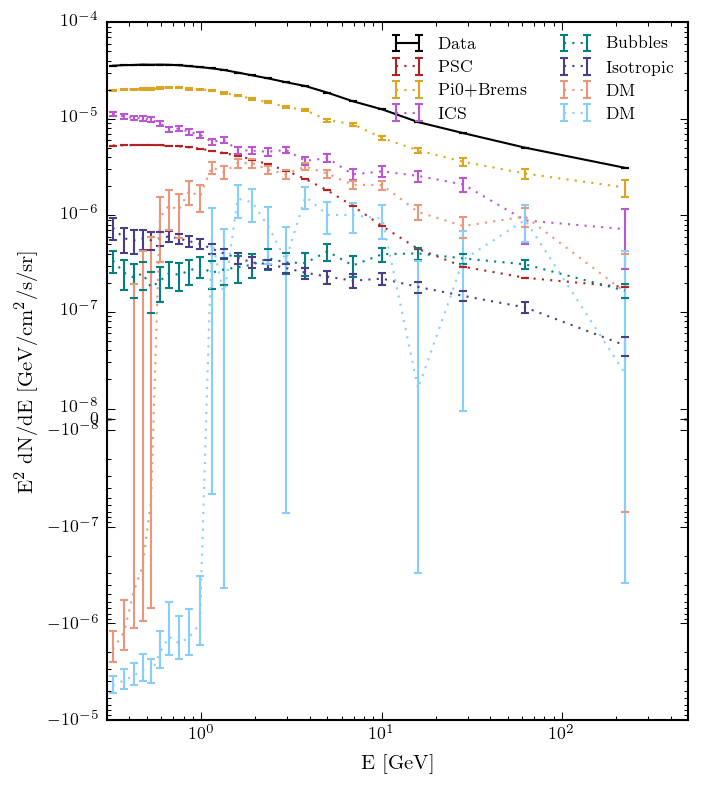

In [42]:
import Template
import Tools, healpy
reload(Tools)


#print np.array(A.m.matrix()).shape

#print A.templateList['DM'].valueError/A.templateList['DM'].value


plt.figure(figsize=(5,6))
def PlotComponent(A, name):
    E, flux, stat = A.GetSpectrum(name)
    #if stat
    if name is 'Data':
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=name.replace('_','+'),
                     capthick=1, capsize=2, ls='-',c='k')
    else:
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=name.replace('_','+'),capthick=1, capsize=2, ls=':' )
    
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    
PlotComponent(A,'Data')    
PlotComponent(A,'PSC')
PlotComponent(A,'Pi0_Brems')
#PlotComponent('Brems')
PlotComponent(A,'ICS')
PlotComponent(A,'Bubbles')
PlotComponent(A,'Isotropic')
PlotComponent(A,'DM')
PlotComponent(A2,'DM')


print np.sum(A.loglike)
print np.sum(A2.loglike)

linthresh=1e-8
plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-5,1e-4)

plt.legend(frameon=False, fontsize=8,ncol=2)
#plt.ylim(1e-8,4e-4)
plt.xlim(.3,500)

#A.SaveSpectra('./mod_c/spec_mod_s_42_P8_GC_free_brems.pickle') # 3FGL with ext XCO fitted 
#A.SaveSpectra('./mod_c/spec_mod_s_44_P8_GC_free_brems.pickle') # 3FGL with ext XCO fitted 
#A.SaveSpectra('./mod_c/spec_mod_s_46_P8_GC.pickle') # 3FGL with ext XCO fitted 


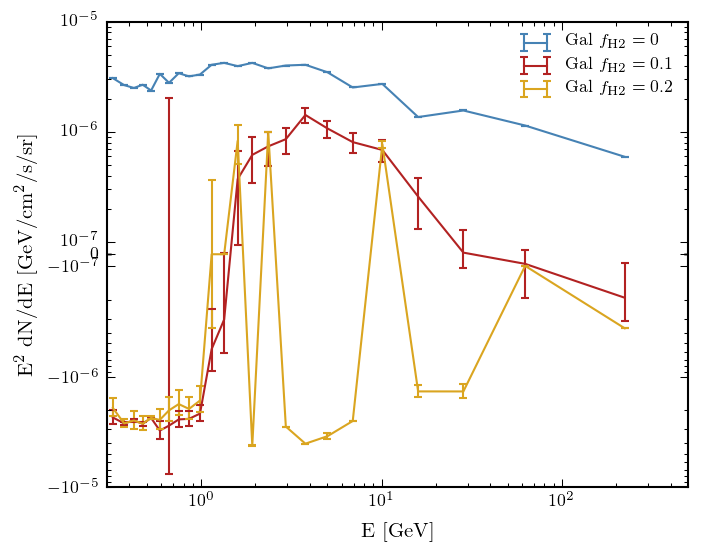

In [61]:
import pickle

plt.figure(figsize=(5,4))
def PlotComponentFromFile(name, filename,label='', linestyle='-'):
    E, flux, stat = pickle.load(open(filename))[name] # A.GetSpectrum(name)
    #if stat
    if name is 'Data':
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=label,
                     capthick=1, capsize=2, ls='-',c='k')
    else:
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=label,capthick=1, capsize=2, ls=linestyle )
    
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')

    
    
PlotComponentFromFile('DM','./mod_c/spec_mod_s_42_P8_GC.pickle', label=r'Gal $f_{\rm H2}=0$ ', linestyle='-')
PlotComponentFromFile('DM','./mod_c/spec_mod_s_44_P8_GC.pickle', label=r'Gal $f_{\rm H2}=0.1$ ', linestyle='-')
PlotComponentFromFile('DM','./mod_c/spec_mod_s_46_P8_GC.pickle', label=r'Gal $f_{\rm H2}=0.2$ ', linestyle='-')




linthresh=1e-7
plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-5,1e-5)
#plt.ylim(5e-8,2e-6)

plt.legend(frameon=False, fontsize=8,ncol=1)

plt.xlim(.3,500)

plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/20x20_ROI.pdf',bbox_inches='tight')


In [6]:
h = h5py.File('/data/GCE_sys/new/mod_s_46_XCO_P8.hdf5')
for f in h:
    print f

fit_results
galdef
templates
